# Data mining for tech term

### Packages

In [3]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
from collections import Counter
import wordcloud
from wordcloud import WordCloud, STOPWORDS

## Load data

In [5]:
K = ['T'+ str(n) for n in list(range(1,16+1))]
code = ['JPN' , 'KOR', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL']
code2 = ['ALL'] + code 
code3 = ['ALL', 'SEA'] + code
code4 = ['SEA'] 
code5 = ['JPN' , 'KOR', 'SEA', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL']
code6 = 'ALL', 'JPN' , 'KOR', 'SEA', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL'


year = '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'
nyear = 'ALL', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'
oyear = '2014', '2015', '2016', '2017', '2018', '2019', '2020'

tcode = ['T1-RNA and transcription', 'T2-Epigenetics and \n epigenomics', 'T3-Genetic disorder', 'T4-Cancer genomics', 
                'T5-Clinical genetics', 'T6-Microbial diversity', 'T7-Microbiome diet', 'T8-Population genomics', 
                'T9-Microbial community', 'T10-Translational medicine', 'T11-Disease mechanisms', 'T12-Bioinformatics and \n evolutionary genomics', 
                'T13-Metabolic pathways', 'T14-Mitochondrial and \n viral genomes', 'T15-Miscellaneous', 'T16-Infection and \n drug resistance']
tcode2 = ['T1-RNA and transcription', 'T2-Epigenetics and epigenomics', 'T3-Genetic disorder', 'T4-Cancer genomics', 
                'T5-Clinical genetics', 'T6-Microbial diversity', 'T7-Microbiome diet', 'T8-Population genomics', 
                'T9-Microbial community', 'T10-Translational medicine', 'T11-Disease mechanisms', 'T12-Bioinformatics and evol. genomics', 
                'T13-Metabolic pathways', 'T14-Mitochondrial and viral genomes', 'T15-Miscellaneous', 'T16-Infection and drug resistance']

tcolor = ['#AEC7E8', '#1F77B4', '#FFBB78', '#FF7F0E', 
           '#98DF8A', '#2CA02C', '#FF9896', '#D62728',
           '#C5B0D5', '#9467BD', '#C49C94', '#8C564B', 
           '#DBDB8D', '#BCBD22', '#C7C7C7', '#7F7F7F']

hsl_color = ['214, 56%, 80%', '205, 71%, 41%', '30, 100%, 74%', '28, 100%, 53%', 
             '110, 57%, 71%', '120, 57%, 40%', '1, 100%, 79%', '0, 69%, 50%',
             '274, 31%, 76%', '271, 39%, 57%', '10, 29%, 68%', '10, 30%, 42%',
             '60, 52%, 71%', '60, 70%, 44%', '0, 0%, 78%', '0, 0%, 50%']

hsl9_color = ['205, 71%, 41%', '28, 100%, 53%', '120, 57%, 40%', '0, 69%, 50%', 
              '271, 39%, 57%', '10, 30%, 42%', '60, 70%, 44%', '0, 0%, 50%', '318, 66%, 68%']

tlist = list(range(0,16))
ddname = {tlist[i]: tcode[i] for i in range(len(tlist))}
ddcolor = {tlist[i]: tcolor[i] for i in range(len(tlist))}
ddcolor2 = {K[i]: tcolor[i] for i in range(len(tlist))}
ddk = {tlist[i]: K[i] for i in range(len(tlist))}
ddn = {K[i]: tlist[i] for i in range(len(tlist))}

dpi = 300
dpi2 = 500

In [6]:
data = pd.read_csv('fig/lda_n/lda_dm.csv')
dt = data['Filtered Abstact']

In [7]:
dt

0        present evidence novel thermophilic bacterium ...
1        key challenge transcriptional regulation able ...
2        heterogeneous vancomycin intermediate staphylo...
3        challenge taxonomy systematics toxic mixture s...
4        huanglongbing hlb destructive disease citrus w...
                               ...                        
21303    cryptic genospecies haemophilus influenzae hae...
21304    european pear fruit pyrus communis respond tem...
21305    gastric_cancer case advanced stage poor progno...
21306    polymerase_chain_reaction pcr recombination si...
21307    clupeiformes sardine herring share worldwide f...
Name: Filtered Abstact, Length: 21308, dtype: object

## Word vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def tfidf_generator (corpus = '', no_features = '', min_df = ''):
    tv = TfidfVectorizer(max_df=0.5, min_df=min_df, max_features=no_features, token_pattern=r'\S+')
    tt = tv.fit_transform(corpus)
    cv = CountVectorizer(max_df=0.5, min_df=min_df, max_features=no_features, token_pattern=r'\S+')
    ct = cv.fit_transform(corpus)
    print (tt.shape, ct.shape)
    return tv, tt, cv, ct 

def wdf_generator(tv = '', tt = '', ct = ''):
    tt_t = tt.transpose()
    dt = tt.sum(axis=0).transpose().tolist()
    dc = ct.sum(axis=0).transpose().tolist()
    dn = [line.nnz for line in tt_t]
    dw = tv.get_feature_names()

    dft = pd.DataFrame(dt, columns = ['tf-idf'])
    dfc = pd.DataFrame(dc, columns = ['word count'])
    dfd = pd.DataFrame(dn, columns = ['document count'])
    dfw = pd.DataFrame(dw, columns = ['word'])

    df = pd.concat([dfw, dft, dfc, dfd],axis=1)
    df['tf-idf norm'] = (df['tf-idf']/df['tf-idf'].sum())*100
    df['word count norm'] = (df['word count']/df['word count'].sum())*100
    df['document count norm'] = (df['document count']/df['document count'].sum())*100
    print (len(df))
    return df

def visualize_df (dff = '', top_words = ''):
    dft = dff.sort_values(by = 'tf-idf', ascending = True, ignore_index = True).tail(top_words)
    dfd = dff.sort_values(by = 'document count', ascending = True, ignore_index = True).tail(top_words)
    dfc = dff.sort_values(by = 'word count', ascending = True, ignore_index = True).tail(top_words)

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(8,6))
    ax1.barh(width = dft['tf-idf'], y= dft['word'])
    ax1.set_title('Cumulative tf-idf', size =13)
    ax1.set_xlabel('Tf-idf value', size =12)

    ax2.barh(width = dfc['word count'], y= dfc['word'])
    ax2.set_title('Word count', size =13)
    #plt.xticks(rotation=90, size=18); plt.yticks(size=14)
    ax2.set_xlabel('Count', size =12)

    ax3.barh(width = dfd['document count'], y= dfd['word'])
    ax3.set_title('Word frequency', size =13)
    #plt.xticks(rotation=90, size=18); plt.yticks(size=14)
    ax3.set_xlabel('Document', size =12)
    plt.tight_layout()
#    plt.savefig('fig/lda/wordbar.png', dpi=dpi)
    plt.show()

In [9]:
tv, tt, cv, ct = tfidf_generator(dt, None, 2)
df = wdf_generator(tv, tt, ct)
fn = tv.get_feature_names()

(21308, 33554) (21308, 33554)


/home/nailil/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


33554


In [10]:
fn = tv.get_feature_names()
fnn = [line for line in fn if line.endswith('seq')]

In [11]:
#kata = '_seq' | '_genom'
df[df['word'].str.contains('assay')][['word', 'document count', 'document count norm']]

,word,document count,document count norm
2350,assay,1291,0.109269
2351,assayed,3,0.000254
3319,bioassay,21,0.001777
14967,immunoassay,13,0.001100


In [12]:
#LIST TECH TERM

fnn_ends = 'seq'

wlist = ['illumina', 'pacbio', 'torrent', 'iontorrent', 'ionpgm',
'metagenom', 'transcriptom',
'_assembly', '_sequencing', 'seq_' 'ome_', 'wide_', '_wide', '_genome_', 
'wholegenome', 'wholeexome', 'nextgeneration', 'nextseq',
'microarray', 'sanger', 'minion', 'gridion', 'promethion']

wlist2 = ['illumina', 'pacbio', 'torrent', 'iontorrent', 'ionpgm',
'metagenom',
'_assembly', '_sequencing', 'seq_' 'ome_', 'wide_', '_wide', '_genome_', 
'wholegenome', 'wholeexome', 'nextgeneration', 'nextseq',
'microarray', 'sanger', 'minion', 'gridion', 'promethion']

In [13]:
#GET WORD LIST

fn = tv.get_feature_names()
fnn = [line for line in fn if line.endswith('seq')]

wdd = []
for f in wlist2 :
    wdl = df[df['word'].str.contains(f)]['word'].tolist()
    wdd.append(wdl)

ffd = [item for sublist in wdd for item in sublist]
fwd = fnn + ffd + ['wgs', 'wes', 'gwas', 'shotgun']
fd = list(set(fwd))

/home/nailil/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
#GET NUMBER OF WORD LIST

fnum = list(range(0, len(fn)))
ddword = {fn[i]: fnum[i] for i in range(len(fnum))}

fdnum = [ddword[i] for i in fd]

In [15]:
# PROCESS WORD

fdn = [f.replace('sequencing', 'seq') for f in fd]
fdn = [f.replace('sequenced', 'seq') for f in fdn]
fdn = [f.replace('sequence', 'seq') for f in fdn]

#fdn = [f.replace('transcriptomics', 'transcriptome') for f in fdn]
#fdn = [f.replace('transcriptomic', 'transcriptome') for f in fdn]
#fdn = [f.replace('transcriptomes', 'transcriptome') for f in fdn]

fdn = [f.replace('metagenomics', 'metagenome') for f in fdn]
fdn = [f.replace('metagenomic', 'metagenome') for f in fdn]
fdn = [f.replace('metagenomes', 'metagenome') for f in fdn]

fdn = [f.replace('complete_genome_seq', 'whole_genome_seq') for f in fdn]
fdn = [f.replace('wgs', 'whole_genome_seq') for f in fdn]
fdn = [f.replace('wes', 'whole_exome_seq') for f in fdn]
fdn = [f.replace('gwas', 'genome_wide_association_study') for f in fdn]
fdn = [f.replace('genome_wide_association_study', 'genome_wide_association') for f in fdn]
fdn = [f.replace('genome_wide_association', 'wide_association_study') for f in fdn]
fdn = [f.replace('wide_association_study', 'genome_wide_association_study') for f in fdn]


#fdn = [f.replace('wide_association_study', 'genome_wide_association_study') for f in fdn]
#fdn = [f.replace('genome_wide_association', 'genome_wide_association_study') for f in fdn]
fdn = [f.replace('whole_genome_assembly', 'genome_assembly') for f in fdn]

fdn = [f.replace('microarrays', 'microarray') for f in fdn]
fdn = [f.replace('torrent', 'iontorrent') for f in fdn]

fdn = [f.replace('rnaseq', 'rna_seq') for f in fdn]
fdn = [f.replace('scrna_seq', 'single_cell_rna_seq') for f in fdn]
fdn = [f.replace('single_cell_rna_seq', 'cell_rna_seq') for f in fdn]
fdn = [f.replace('cell_rna_seq', 'single_cell_rna_seq') for f in fdn]



fdn = [f.replace('complete_mitochondrial_genome_seq', 'mitochondrial_genome_seq') for f in fdn]
fdn = [f.replace('complete_chloroplast_genome_seq', 'chloroplast_genome_seq') for f in fdn]


#fdn = [f.replace('sequence', 'seq') for f in fdn]

## Create dataframe

In [16]:
ttt = ct.T
ddfnum = {}
for f in fdnum:
    l = ttt[f].todense().tolist()
    ddfnum[f] = [item for sublist in l for item in sublist]

In [17]:
code3

['ALL', 'SEA', 'JPN', 'KOR', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL']

In [18]:
z = pd.DataFrame(ddfnum)
z.columns = fdn
x = z.groupby(level=0, axis=1).sum()
wflist = list(x.columns)

x['sum'] = x.sum(axis =1).tolist()

y = data[list(code3)]
w = pd.concat([x,y], axis =1)

y2 = data[['ALL'] +K]
y2[(y2 > 0)] = 1
w2 = pd.concat([x,y2], axis =1)

/tmp/ipykernel_3140/3980077295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2[(y2 > 0)] = 1
/home/nailil/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


### Visualize in horizontal bar

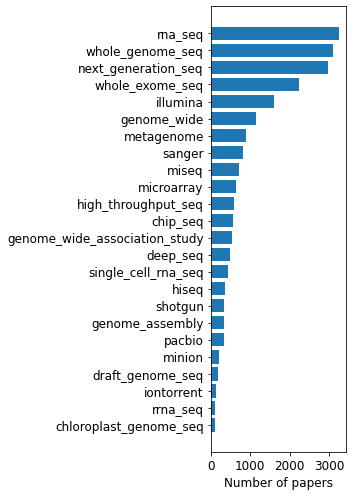

In [19]:
fig,ax = plt.subplots(figsize = (5,7))

hb = pd.DataFrame(w[wflist].sum())
hb = hb.sort_values(by = 0).tail(25)
hb = hb.drop(index = 'seq')
plt.barh(hb.index.tolist(), hb[0])
plt.xlabel('Number of papers', size = 12)
plt.yticks(size = 12), plt.xticks(size = 12)
plt.tight_layout()
#plt.savefig('fig/lda_n/tech_bar.png', bbox_inches='tight', dpi = dpi)
plt.show()

In [18]:
hb

,0
chloroplast_genome_seq,104
rrna_seq,108
iontorrent,140
draft_genome_seq,189
minion,214
pacbio,331
genome_assembly,335
shotgun,343
hiseq,349
single_cell_rna_seq,437


## Analyse tech term in country

### Get wordcloud

12660

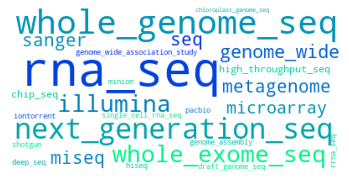

In [19]:
t = w[(w['ALL'] == True) & (w['sum'] > 0)][wflist]
tw = pd.DataFrame(t.sum(axis = 0))
tr = tw.sort_values(by = 0, ascending = False).head(25)

wordcloud = WordCloud(background_color='white', random_state = 2, colormap = 'winter').generate(str(tr))

plt.imshow(wordcloud)
plt.axis("off")
len(t)

In [20]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(200,50%%, %d%%)" % np.random.randint(49,51))


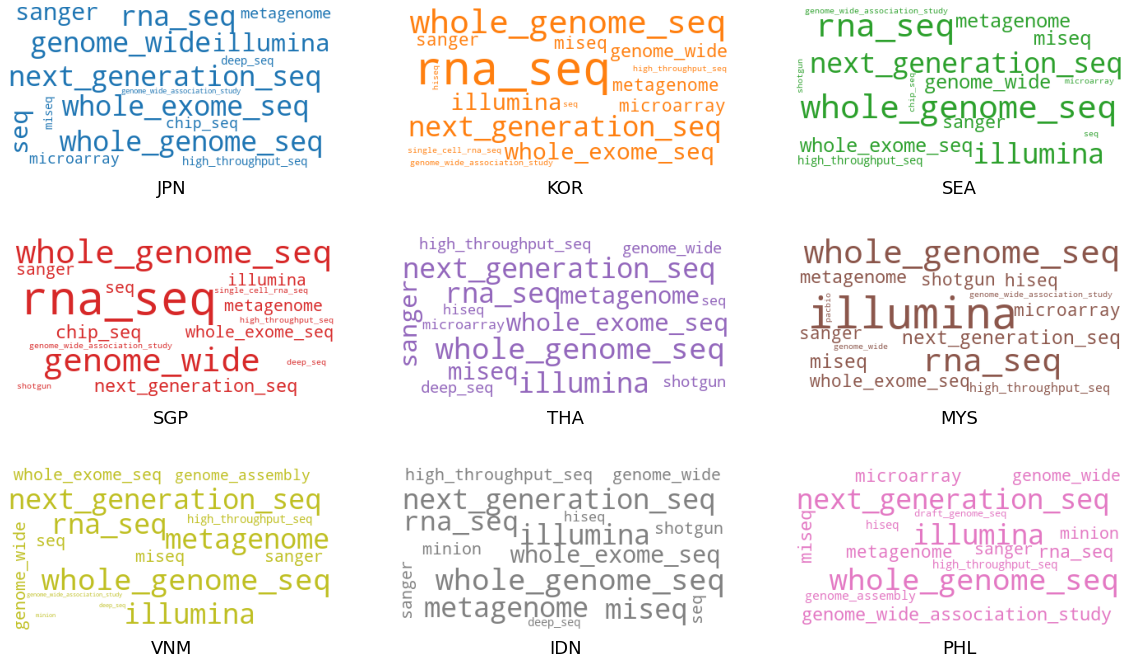

In [21]:
rows, row = 3, 0
cols, col = 3, 0

fig, ax = plt.subplots(rows, cols, figsize=(20, 12))

def color(i):
    def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
        return('hsl('+ i +')'.format(np.random.randint(49,51)))
    return grey_color_func


for f,c in zip(code5, hsl9_color): 

    t = w[(w[f] == True) & (w['sum'] > 0)][wflist]
    tw = pd.DataFrame(t.sum(axis = 0))
    tr = tw.sort_values(by = 0, ascending = False).head(15)

    wordcloud = WordCloud(background_color='white', random_state = 2).generate(str(tr))
    wordcloud.recolor(color_func = color(c))
    ax[col][row].imshow(wordcloud)
    ax[col][row].axis("off")
    ax[col][row].set_title(f, y=-0.05,pad=-14, size = 18)
    row=row+1
    if row==rows:
        row=0
        col=col+1

#plt.savefig('fig/lda_n/tech_wc.png', bbox_inches='tight', dpi=dpi)
plt.show()

### Get bar plot

In [20]:
# get percentage article with tech term 
cart = []
for f in code6:
    co = w[w[f] == True]
    c = w[(w[f] == True) & (w['sum'] > 0)]
    c = f, len(co), len(c)
    cart.append(c)

columns =    ['Country', 'Article count', 'Article count with tech term', 'Percentages']
dcart = pd.DataFrame(cart)
dcart['Percetages'] = [t/f  for f,t in zip(dcart[1].tolist(), dcart[2].tolist())]
dcart.columns = columns
#dcart.to_excel('fig/lda_n/ac_tech.xlsx')

In [21]:
# prepare input

cd = code2

ddbw = {}
for f in cd: 
    b = w[(w[f] == True) & (w['sum'] > 0)][wflist]
    ddbw[f] = pd.DataFrame(b.sum(axis = 0))

dbw = pd.concat([ddbw[f] for f in cd], axis =1)
dbw.columns = cd
dbw = dbw.div(dbw.sum(axis=0), axis=1)
#dbw = dbw * 10
sbw = dbw.sum(axis = 1).tolist()
dbw['sum'] = sbw

In [22]:
llist = []
for f in cd: 
    bm = dbw.sort_values(by = f).tail(20)
    l = bm.index.tolist()
    llist.append(l)
    
llist = [item for sublist in llist for item in sublist]
llist = list(set(llist))

dbwt = dbw.drop(columns = 'sum')
dbwt = dbwt.T
dbwt = dbwt[llist]
dbwt = dbwt.drop(columns = 'seq')
dbwt = dbwt.T
dbwt['sum'] = dbwt.sum(axis = 1 ).tolist()
dbwt = dbwt.sort_values(by = 'sum', ascending= False)
dbwt = dbwt.drop(columns = 'sum')

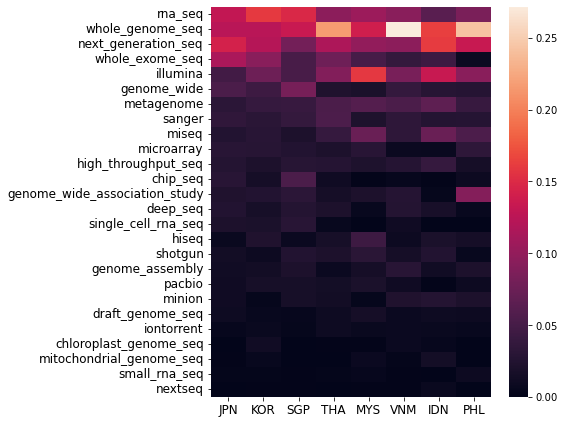

In [23]:
# GET HEATMAP

fig, ax = plt.subplots(figsize=(8,6))

ch = dbwt
ch = ch.sort_values(by = 'ALL', ascending = False)
ch = ch.drop(columns = 'ALL')
#ch = ch.drop(index = 'nextseq')

sns.heatmap(ch)
plt.yticks(size=12), plt.xticks(size=12)
plt.tight_layout()
#plt.savefig('fig/lda_n/tech_prop_ht_nall.png', dpi=dpi)

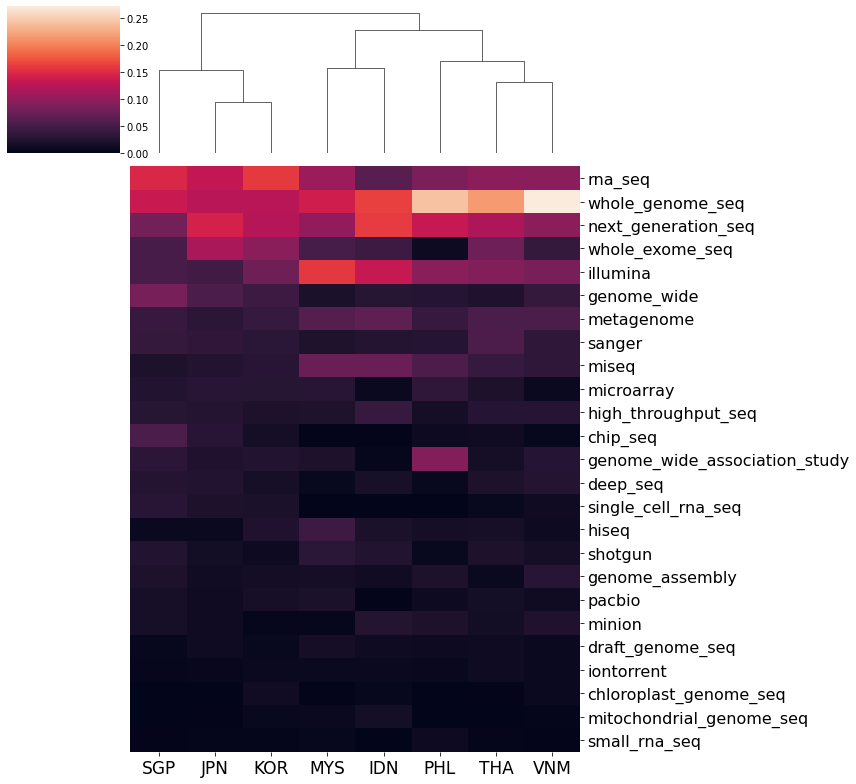

In [55]:
#GET CLUSTERMAP

#fig, ax = plt.subplots(figsize=(5,7))

cm = dbwt
cm = cm.sort_values(by = 'ALL', ascending = False)
cm = cm.drop(columns = 'ALL')
cm = cm.drop(index = 'nextseq')

g = sns.clustermap(cm, row_cluster=False, figsize=(12,11), annot=False, cmap = 'rocket', 
                  tree_kws=dict(linewidths=0.75))

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, size = 16)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0, size = 17)
plt.tight_layout()
#plt.savefig('fig/lda_n/tech_propf_nall.png', dpi=dpi)

## Analyse tech word in topic

### Get wordcloud

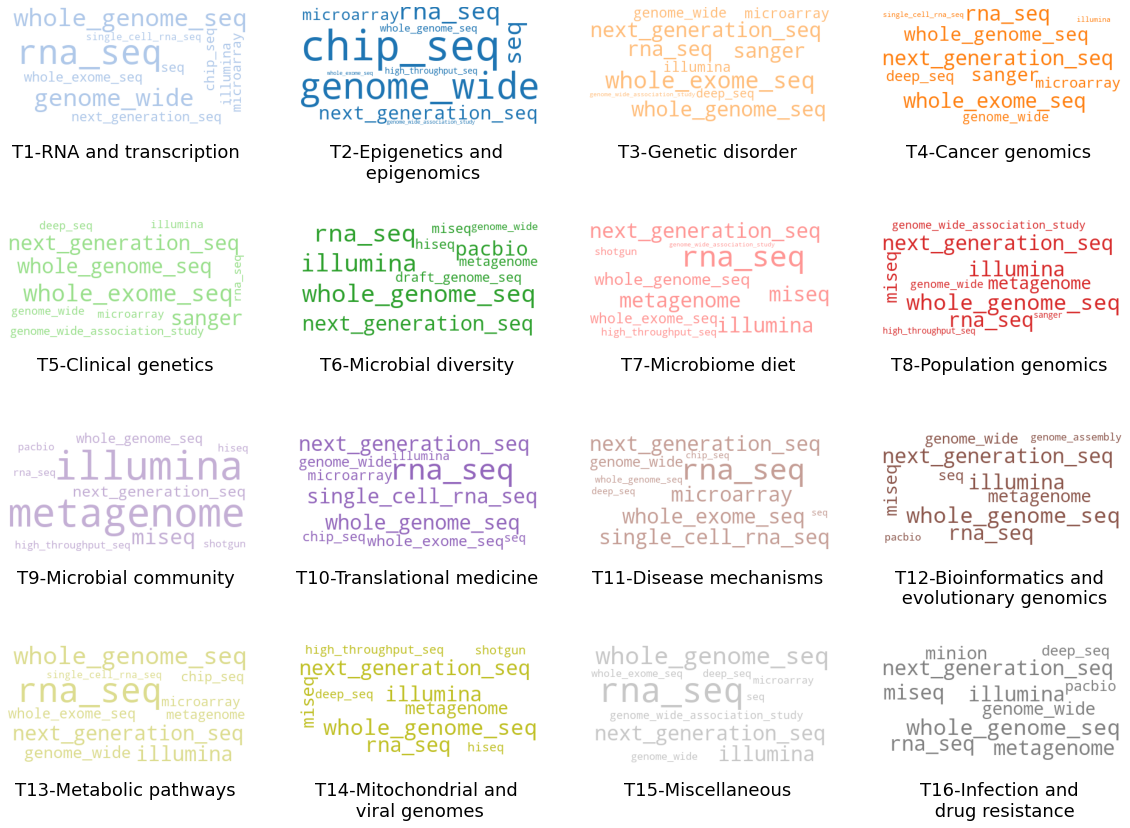

In [25]:
rows, row = 4, 0
cols, col = 4, 0

fig, ax = plt.subplots(rows, cols, figsize=(20, 15))

topic_name = ['T1-RNA and transcription \n ', 'T2-Epigenetics and \n epigenomics', 'T3-Genetic disorder \n ', 'T4-Cancer genomics \n ', 
                'T5-Clinical genetics \n ', 'T6-Microbial diversity \n ', 'T7-Microbiome diet \n ', 'T8-Population genomics \n ', 
                'T9-Microbial community \n ', 'T10-Translational medicine \n ', 'T11-Disease mechanisms \n ', 'T12-Bioinformatics and \n evolutionary genomics', 
                'T13-Metabolic pathways \n ', 'T14-Mitochondrial and \n viral genomes ', 'T15-Miscellaneous \n ', 'T16-Infection and \n drug resistance']

def color(i):
    def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
        return('hsl('+ i +')'.format(np.random.randint(49,51)))
    return grey_color_func


for f,n,c in zip(K, topic_name, hsl_color): 

    t = w2[(w2[f] == True) & (w2['sum'] > 0)][wflist]
    tw = pd.DataFrame(t.sum(axis = 0))
    tr = tw.sort_values(by = 0, ascending = False).head(10)

    wordcloud = WordCloud(background_color='white', random_state = 2).generate(str(tr))
    wordcloud.recolor(color_func = color(c))
    ax[col][row].imshow(wordcloud)
    ax[col][row].axis("off")
    ax[col][row].set_title(n, y=-0.3,pad=-14, size = 18)
    row=row+1
    if row==rows:
        row=0
        col=col+1
        
#plt.tight_layout()
plt.savefig('fig/lda_n/tech_twc.png', bbox_inches='tight', dpi=dpi)
plt.show()

### Get bar plot

In [26]:
# get percentage article with tech term 

K2 = ['ALL'] + K
cart = []
for f in K2:
    co = w2[w2[f] == True]
    c = w2[(w2[f] == True) & (w2['sum'] > 0)]
    c = f, len(co), len(c)
    cart.append(c)

columns =    ['Topic', 'Article count', 'Article count with tech term', 'Percentages']
dcart = pd.DataFrame(cart)
dcart['Percetages'] = [t/f  for f,t in zip(dcart[1].tolist(), dcart[2].tolist())]
dcart.columns = columns
#dcart.to_excel('fig/lda_n/act_tech.xlsx')

In [57]:
dcart

,Topic,Article count,Article count with tech term,Percentages
0,ALL,21308,12660,0.594143
1,T1,8397,4743,0.564845
2,T2,1691,996,0.589001
3,T3,3124,1907,0.610435
4,T4,4238,2525,0.595800
5,T5,4064,2687,0.661171
6,T6,2231,1235,0.553563
7,T7,1683,913,0.542484
8,T8,6705,4379,0.653095
9,T9,2308,1266,0.548527


In [27]:
# prepare input

ddbw = {}
for f in K2: 
    b = w2[(w2[f] == True) & (w2['sum'] > 0)][wflist]
    ddbw[f] = pd.DataFrame(b.sum(axis = 0))

dbw = pd.concat([ddbw[f] for f in K2], axis =1)
dbw.columns = K2
dbw = dbw.div(dbw.sum(axis=0), axis=1)
#dbw = dbw * 10
sbw = dbw.sum(axis = 1).tolist()
dbw['sum'] = sbw

In [28]:
llist = []
for f in K2: 
    bm = dbw.sort_values(by = f).tail(8)
    l = bm.index.tolist()
    llist.append(l)
    
llist = [item for sublist in llist for item in sublist]
llist = list(set(llist))

dbwt = dbw.drop(columns = 'sum')
dbwt = dbwt.T
dbwt = dbwt[llist]
dbwt = dbwt.drop(columns = 'seq')
dbwt = dbwt.T
dbwt['sum'] = dbwt.sum(axis = 1 ).tolist()
dbwt = dbwt.sort_values(by = 'sum', ascending= False)
dbwt = dbwt.drop(columns = 'sum')
dbwt.columns = K2

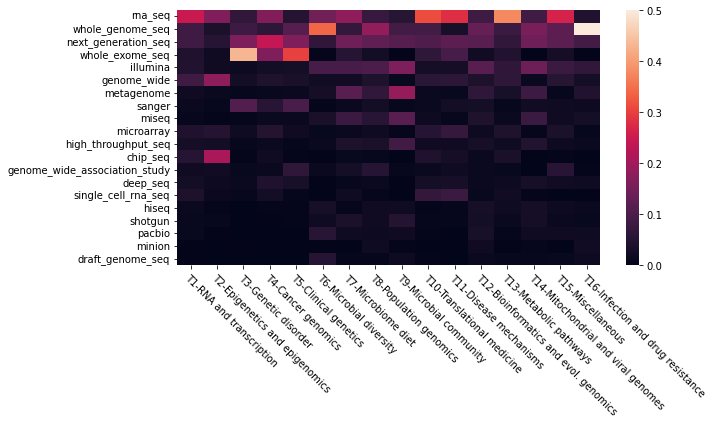

In [29]:
# GET HEATMAP

fig, ax = plt.subplots(figsize=(10,6))

ch = dbwt.sort_values(by = 'ALL', ascending = False)
ch = ch.drop(columns = 'ALL')
ch.columns = tcode2

sns.heatmap(ch)
plt.xticks(rotation = 315, ha="left", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('fig/lda_n/tech_tprop_ht.png', dpi=dpi)

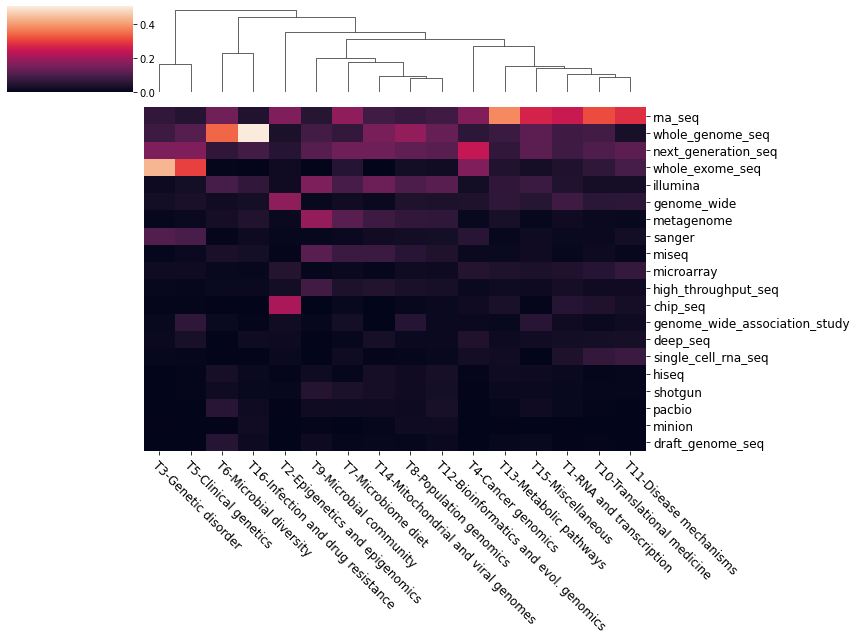

In [30]:
#fig, ax = plt.subplots(figsize=(5,7))

cm = dbwt.sort_values(by = 'ALL', ascending = False)
cm = cm.drop(columns = 'ALL')
cm.columns = tcode2

g = sns.clustermap(cm, row_cluster=False, figsize=(12,9), annot=False, cmap = 'rocket', 
                  tree_kws=dict(linewidths=0.75))

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, size = 12)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), size = 12, rotation=315,  ha="left", rotation_mode="anchor")
plt.tight_layout(h_pad = -2.5)
plt.savefig('fig/lda_n/tech_tpropf.png', dpi=dpi)
plt.show()

In [34]:
cm

,T1-RNA and transcription,T2-Epigenetics and \n gene expression,T3-Genetic disorder,T4-Cancer genomics,T5-Clinical genetics,T6-Microbial diversity,T7-Microbiome diet,T8-Population genomics,T9-Microbial community,T10-Translational medicine,T11-Gene regulation,T12-Bioinformatics and \n evol. genomics,T13-General mechanism,T14-Viral diversity,T15-Miscellaneous,T16-Infection and \n drug resistance
rna_seq,0.246925,0.161621,0.064672,0.163555,0.047294,0.143453,0.180707,0.074200,0.052535,0.313111,0.280471,0.083893,0.377978,0.085133,0.264676,0.044878
whole_genome_seq,0.084055,0.035916,0.078271,0.059088,0.113431,0.340115,0.066576,0.185336,0.088168,0.088355,0.033241,0.132616,0.078152,0.152824,0.120494,0.500813
next_generation_seq,0.083827,0.050795,0.159565,0.241787,0.162017,0.063641,0.141984,0.124766,0.112837,0.103013,0.119806,0.114471,0.066241,0.142027,0.117405,0.088130
whole_exome_seq,0.042483,0.021036,0.431550,0.161428,0.301681,0.005738,0.050272,0.023964,0.003655,0.062296,0.093837,0.022961,0.044741,0.000831,0.027806,0.002602
illumina,0.043964,0.020010,0.016924,0.024817,0.025864,0.092853,0.094429,0.100363,0.159890,0.029316,0.028047,0.114471,0.063626,0.138289,0.077240,0.065366
genome_wide,0.084055,0.179066,0.023874,0.040652,0.033808,0.022953,0.023098,0.039903,0.010507,0.055782,0.059557,0.039091,0.061883,0.012043,0.051493,0.026992
metagenome,0.020046,0.014366,0.008764,0.010399,0.014410,0.028169,0.114130,0.065516,0.187300,0.015472,0.010042,0.062164,0.032249,0.081811,0.009269,0.044878
sanger,0.014123,0.008209,0.106679,0.053179,0.095880,0.005738,0.014266,0.024843,0.009593,0.014658,0.023546,0.026770,0.009297,0.022010,0.018538,0.015935
miseq,0.008428,0.005131,0.007253,0.011818,0.015149,0.033907,0.076766,0.054743,0.116035,0.015879,0.009349,0.040771,0.011912,0.076412,0.019567,0.027317
microarray,0.042141,0.048230,0.019039,0.047270,0.021245,0.009911,0.014266,0.017918,0.006396,0.050081,0.068906,0.017025,0.039802,0.006645,0.037075,0.008130
